**UAS Clustering**

kelompok
- Mellynda Noor Romadhoni A11.2022.14027
- Eka Wahyu Utami A11.2022.14028
- Nur Aqliah Ilmi A11.2022.14039

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


## load library

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings
import sys
#if not sys.warnoptions:
#    warnings.simplefilter("ignore")
np.random.seed(42)

In [ ]:
# settings to display all columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",None)

In [ ]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [ ]:
data =pd.read_csv('/content/drive/My Drive/Colab Notebooks/Wholesalecustomersdata.csv', sep=',')
print("Number of datapoints:", len(data))
data.head()

Number of datapoints: 440


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


tidak ada data yang hilang

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


tidak ada data duplikat

In [ ]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Feature engineering

### membuat fitur baru Total_Barang

In [ ]:
data['totalbarang'] = data.iloc[:, 2:].sum(axis=1)

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,totalbarang
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [ ]:
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,totalbarang
435,1,3,29703,12051,16027,13135,182,2204,73302
436,1,3,39228,1431,764,4510,93,2346,48372
437,2,3,14531,15488,30243,437,14841,1867,77407
438,1,3,10290,1981,2232,1038,168,2125,17834
439,1,3,2787,1698,2510,65,477,52,7589


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   totalbarang       440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


In [ ]:
# data['Average_Spend'] = data.iloc[:, 2:].mean(axis=1)

##membuat fitur rasio untuk setiap kategori ada 6

In [ ]:
# data['Fresh_Ratio'] = data['Fresh'] / data['Total_Spend']
# data['Milk_Ratio'] = data['Milk'] / data['Total_Spend']
# data['Grocery_Ratio'] = data['Grocery'] / data['Total_Spend']
# data['Frozen_Ratio'] = data['Frozen'] / data['Total_Spend']
# data['Detergents_Paper_Ratio'] = data['Detergents_Paper'] / data['Total_Spend']
# data['Delicassen_Ratio'] = data['Delicassen'] / data['Total_Spend']

In [ ]:
# data['Total_totalratio'] = data['Fresh_Ratio']+data['Milk_Ratio']+data['Grocery_Ratio']+data['Frozen_Ratio']+data['Detergents_Paper_Ratio']+data['Delicassen_Ratio']

##Buat Fitur Barang_konsumsi

In [ ]:
data["barangKonsumsi"] = data["Fresh"] + data["Milk"] + data["Grocery"] + data["Frozen"] + data["Delicassen"]

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,totalbarang,barangKonsumsi
0,2,3,12669,9656,7561,214,2674,1338,34112,31438
1,2,3,7057,9810,9568,1762,3293,1776,33266,29973
2,2,3,6353,8808,7684,2405,3516,7844,36610,33094
3,1,3,13265,1196,4221,6404,507,1788,27381,26874
4,2,3,22615,5410,7198,3915,1777,5185,46100,44323


##Buat Fitur Selisih Fresh dan Frozen

In [ ]:
data['selisih_fresh_frozen'] = data['Fresh'] - data['Frozen']

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,totalbarang,barangKonsumsi,selisih_fresh_frozen
0,2,3,12669,9656,7561,214,2674,1338,34112,31438,12455
1,2,3,7057,9810,9568,1762,3293,1776,33266,29973,5295
2,2,3,6353,8808,7684,2405,3516,7844,36610,33094,3948
3,1,3,13265,1196,4221,6404,507,1788,27381,26874,6861
4,2,3,22615,5410,7198,3915,1777,5185,46100,44323,18700


In [ ]:
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,totalbarang,barangKonsumsi,selisih_fresh_frozen
435,1,3,29703,12051,16027,13135,182,2204,73302,73120,16568
436,1,3,39228,1431,764,4510,93,2346,48372,48279,34718
437,2,3,14531,15488,30243,437,14841,1867,77407,62566,14094
438,1,3,10290,1981,2232,1038,168,2125,17834,17666,9252
439,1,3,2787,1698,2510,65,477,52,7589,7112,2722


### cek fitur yang bertipe kategori

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Channel               440 non-null    int64
 1   Region                440 non-null    int64
 2   Fresh                 440 non-null    int64
 3   Milk                  440 non-null    int64
 4   Grocery               440 non-null    int64
 5   Frozen                440 non-null    int64
 6   Detergents_Paper      440 non-null    int64
 7   Delicassen            440 non-null    int64
 8   totalbarang           440 non-null    int64
 9   barangKonsumsi        440 non-null    int64
 10  selisih_fresh_frozen  440 non-null    int64
dtypes: int64(11)
memory usage: 37.9 KB


In [ ]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 100:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

tidak ada yang betipe kategorikal

### hapus fitur yang redundant (karena ada beberapa fitur baru yang terbuat)

In [ ]:
to_drop = ["Channel",	"Region"]
data = data.drop(to_drop, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Fresh                 440 non-null    int64
 1   Milk                  440 non-null    int64
 2   Grocery               440 non-null    int64
 3   Frozen                440 non-null    int64
 4   Detergents_Paper      440 non-null    int64
 5   Delicassen            440 non-null    int64
 6   totalbarang           440 non-null    int64
 7   barangKonsumsi        440 non-null    int64
 8   selisih_fresh_frozen  440 non-null    int64
dtypes: int64(9)
memory usage: 31.1 KB


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

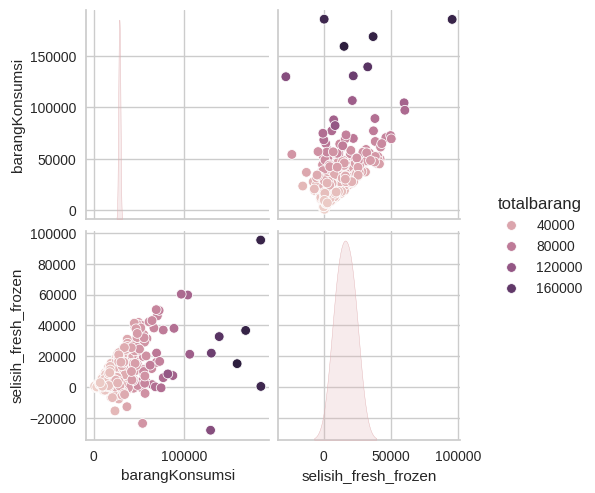

In [ ]:
#Plotting following features
To_Plot = [ "totalbarang", "barangKonsumsi", "selisih_fresh_frozen"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "totalbarang")
#Taking hue
plt.show()

cek korelasi

<Axes: >

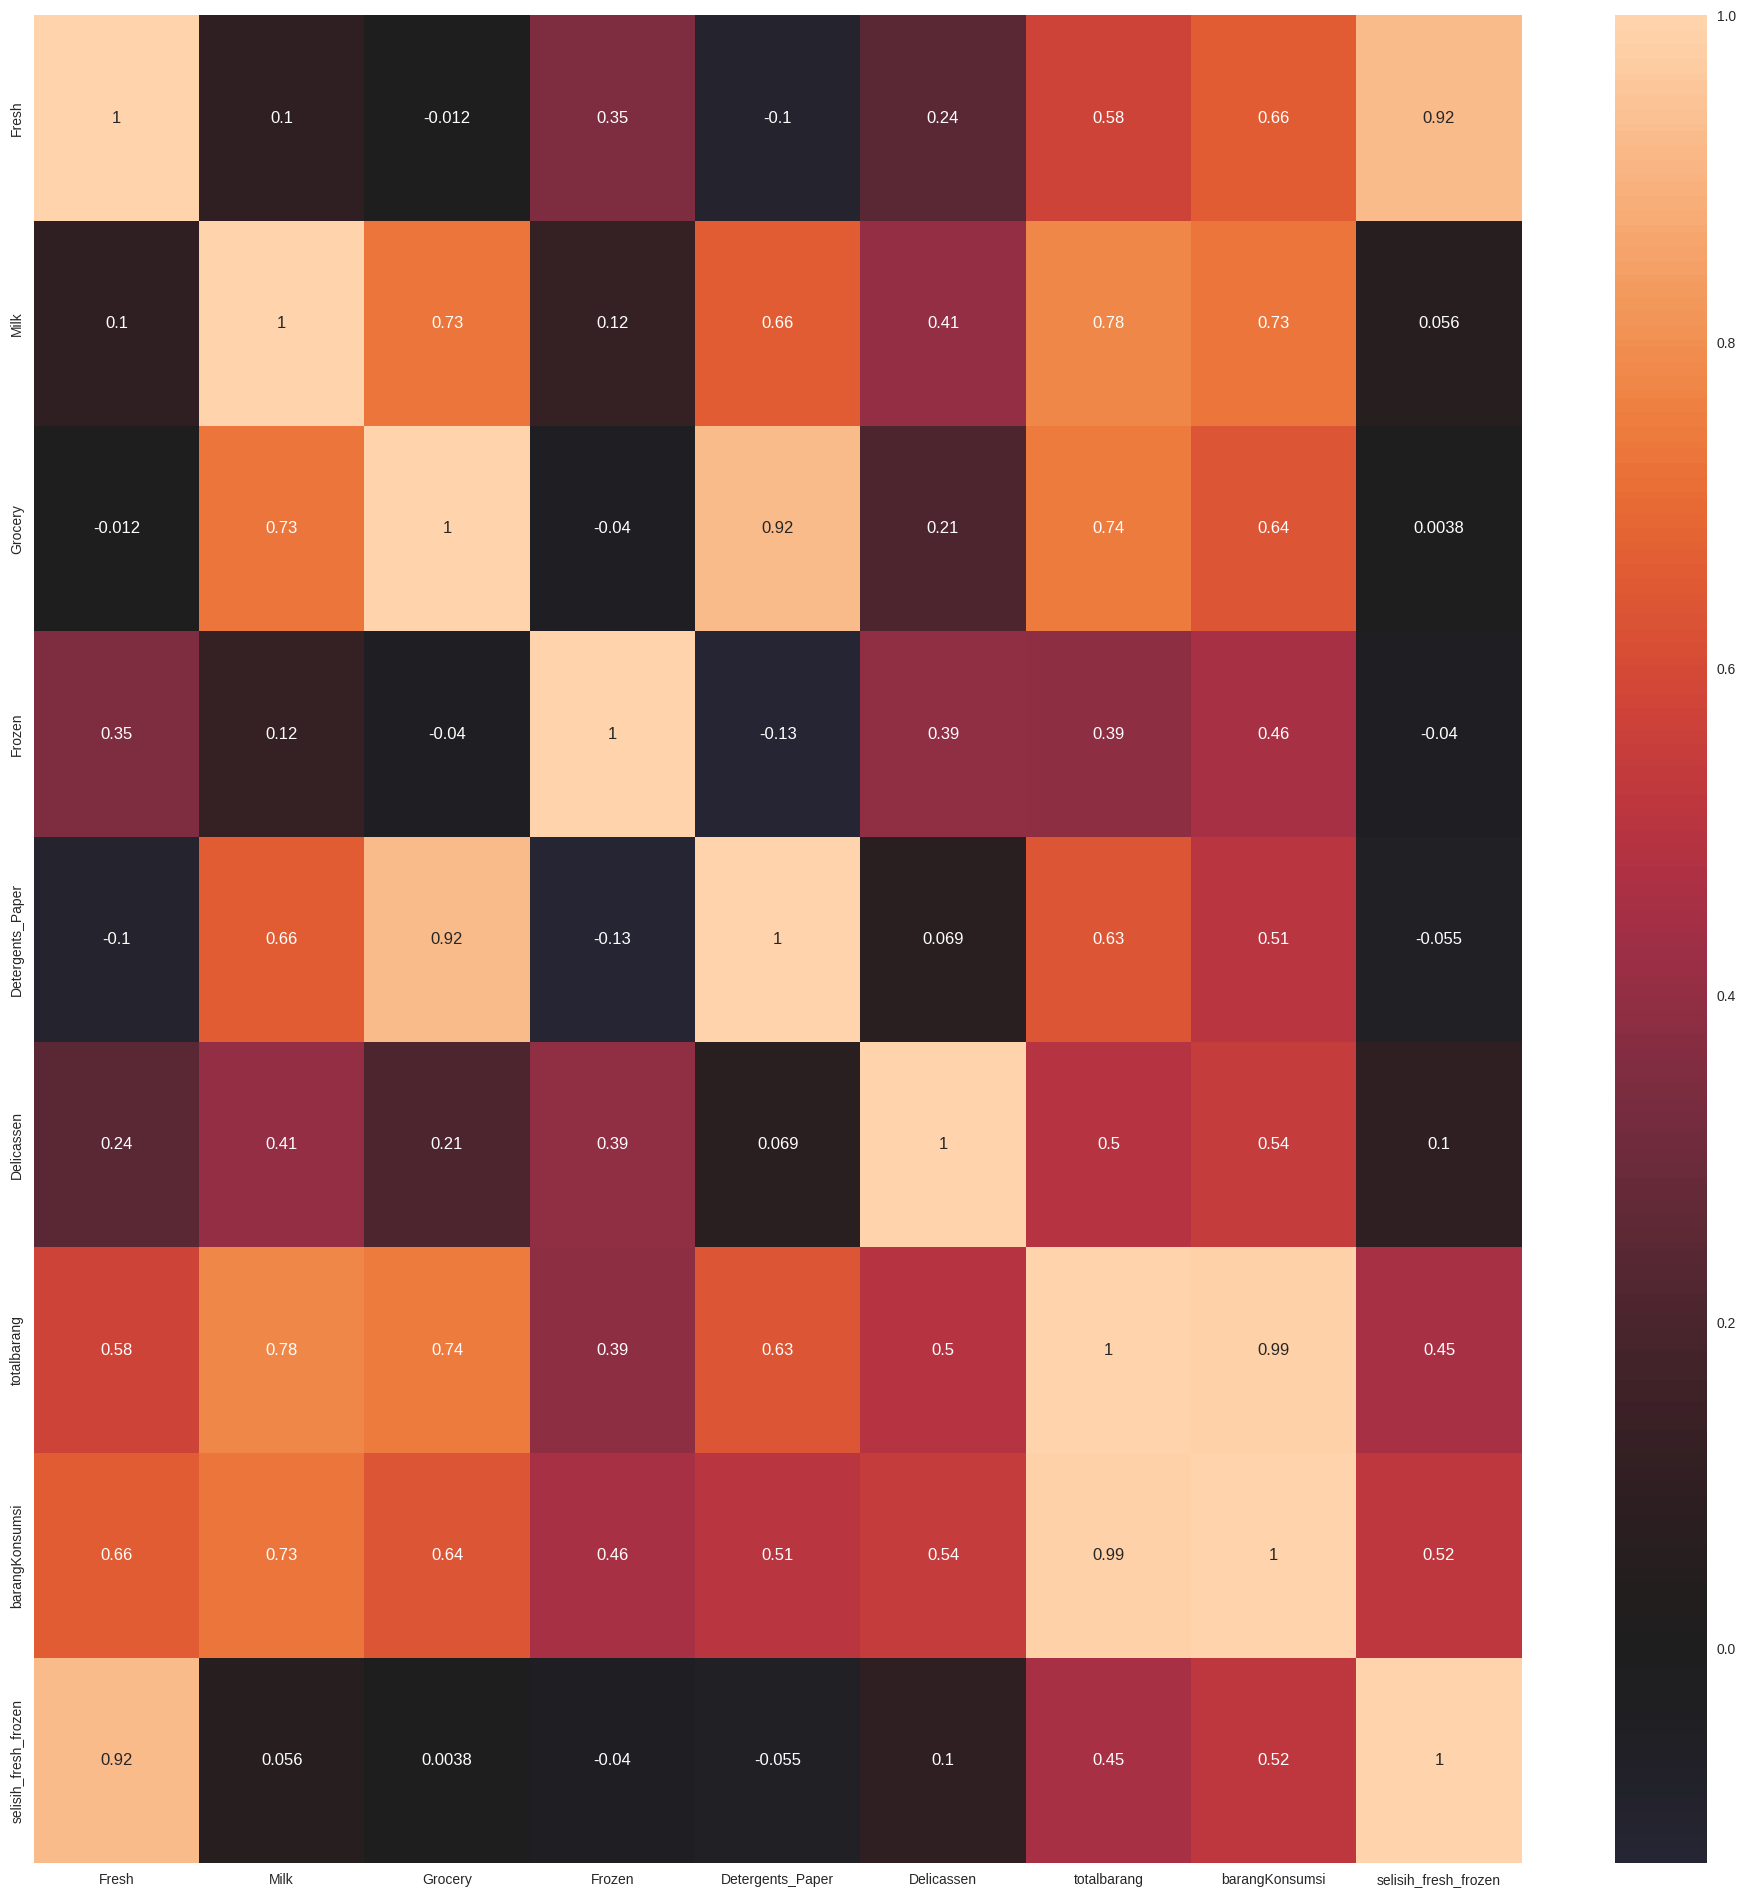

In [ ]:
#correlation matrix
corrmat= data.corr(numeric_only=True)
plt.figure(figsize=(24,24))
sns.heatmap(corrmat,annot=True, center=0)

In [ ]:
ds = data.copy()

In [ ]:
# cols_del = ['Channel', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
# ds = ds.drop(cols_del, axis=1)
# ds.head()

In [ ]:
ds.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,totalbarang,barangKonsumsi,selisih_fresh_frozen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364,30344.643182,8928.365909
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730,23623.633893,11876.425027
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000,897.000000,-28152.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000,16474.250000,999.750000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000,24901.500000,5938.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000,36817.750000,13429.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000,185444.000000,95406.000000


In [ ]:
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
scaled_ds.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,totalbarang,barangKonsumsi,selisih_fresh_frozen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.033649,0.046335,0.297282
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.001514,-0.015750,-0.306279
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.128535,0.116514,-0.419826
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.222026,-0.147081,-0.174271
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.489011,0.592384,0.823712


In [ ]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
#Let's check the Hopkins measure
hopkin_avg = []
for i in range(0,100):
    a = hopkins(scaled_ds)
    hopkin_avg.append(a)

np.array(hopkin_avg).mean()

0.9448044863087043

###PCA


In [ ]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["PC1","PC2", "PC3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1,440.0,-6.459479e-17,2.120913,-2.541748,-1.268576,-0.449281,0.599926,13.654769
PC2,440.0,-8.074349e-18,1.500124,-7.149454,-0.759113,-0.036906,0.708929,8.159321
PC3,440.0,1.211152e-17,1.142187,-2.625834,-0.433670,-0.058268,0.315079,12.878583


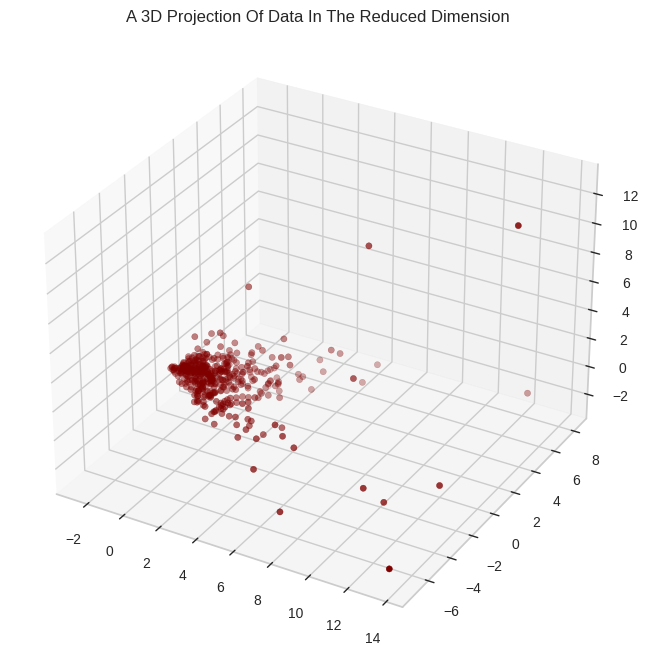

In [ ]:
x =PCA_ds["PC1"]
y =PCA_ds["PC2"]
z =PCA_ds["PC3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

### cek K Optimal menggunakan elbow method

Elbow Method to determine the number of clusters to be formed:


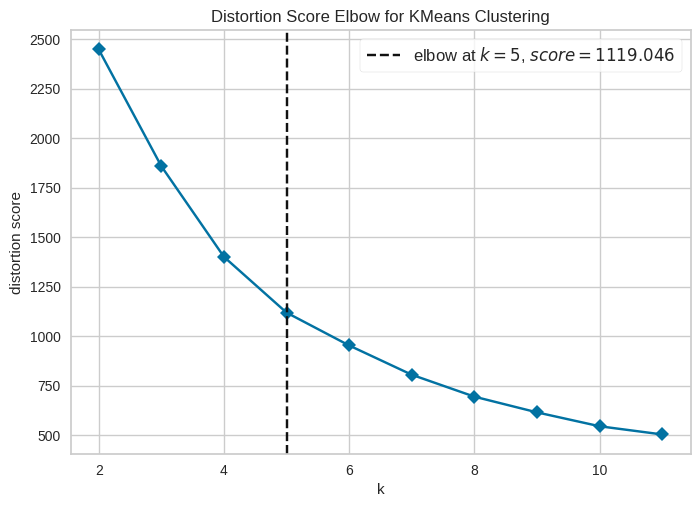

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(n_init=10), k=(2,12), timings=False)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

keputusan saya memakai cluster 5

In [ ]:
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

In [ ]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,totalbarang,barangKonsumsi,selisih_fresh_frozen,Clusters
0,12669,9656,7561,214,2674,1338,34112,31438,12455,3
1,7057,9810,9568,1762,3293,1776,33266,29973,5295,3
2,6353,8808,7684,2405,3516,7844,36610,33094,3948,2
3,13265,1196,4221,6404,507,1788,27381,26874,6861,0
4,22615,5410,7198,3915,1777,5185,46100,44323,18700,0


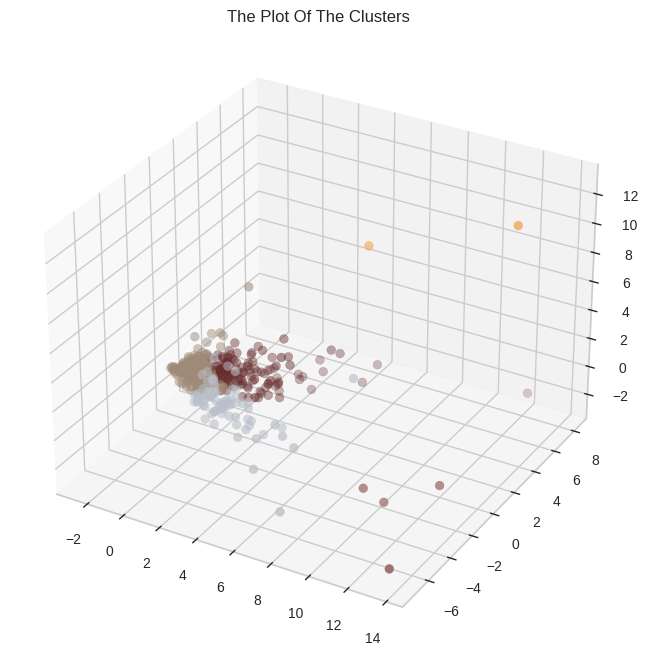

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

<ipython-input-41-e45e5b3cebfb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)


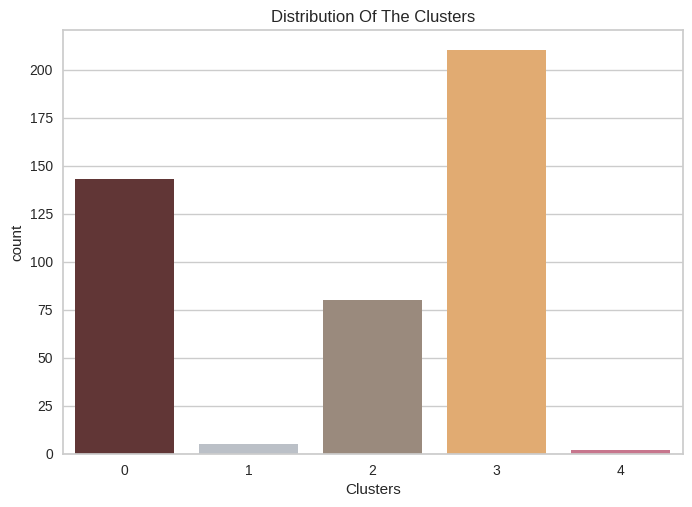

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60", "#D56887"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

pola cluster degan total barang

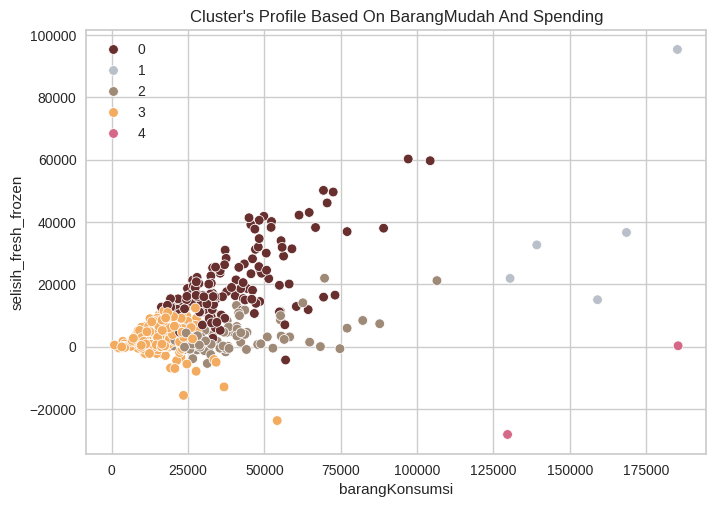

In [ ]:
pl = sns.scatterplot(data = data,x=data["barangKonsumsi"], y=data["selisih_fresh_frozen"],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On BarangMudah And Spending")
plt.legend()
plt.show()

- group 0: high spending and average ba
- group 1: low spending and low income
- group 2: high spending and high income
- group 3: low spending and average income

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-47-1c3b5fcf14f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(x=data["Clusters"], y=data["totalbarang"], palette=pal)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seabo

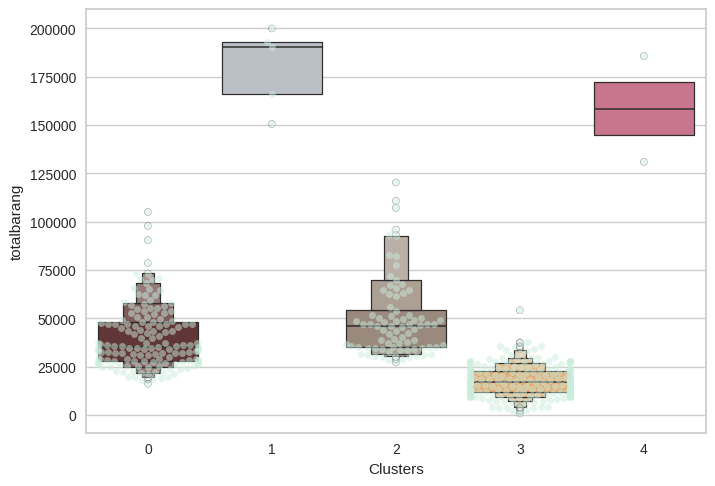

In [ ]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["totalbarang"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["totalbarang"], palette=pal)
plt.show()

## Profiling

### Cek Rasio Berdasarkan Total_Barang

In [ ]:
Rasio = ["Fresh",	"Milk",	"Grocery",	"Frozen",	"Detergents_Paper",	"Delicassen" ]

<Figure size 800x550 with 0 Axes>

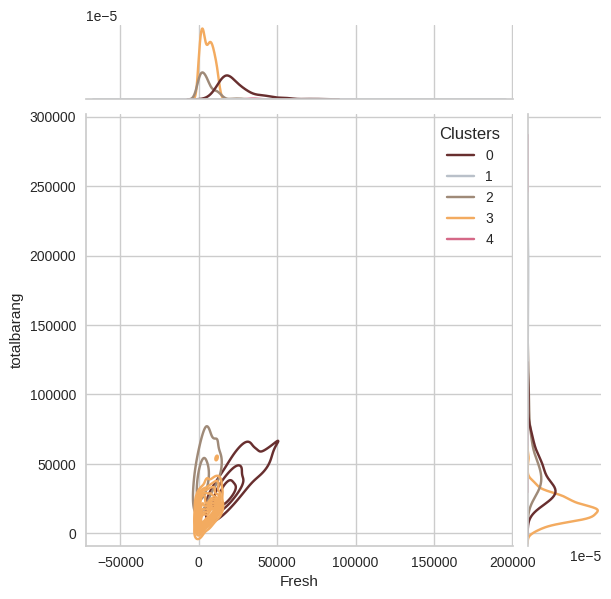

<Figure size 800x550 with 0 Axes>

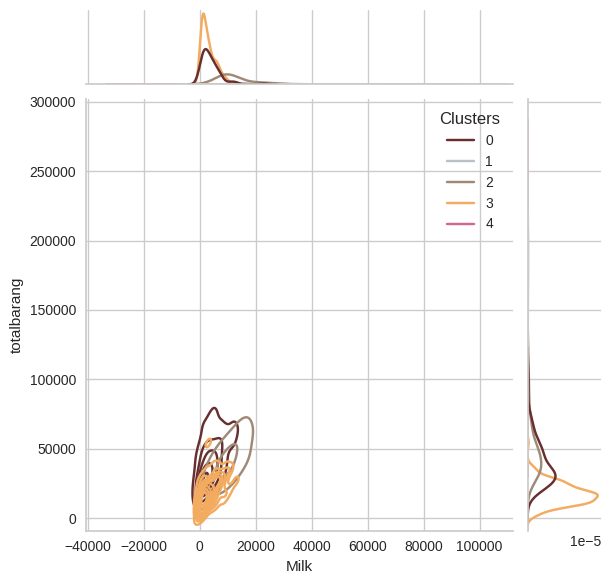

<Figure size 800x550 with 0 Axes>

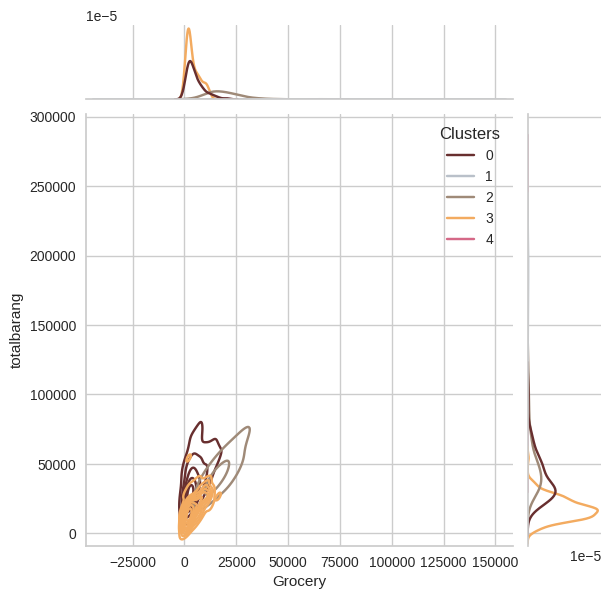

<Figure size 800x550 with 0 Axes>

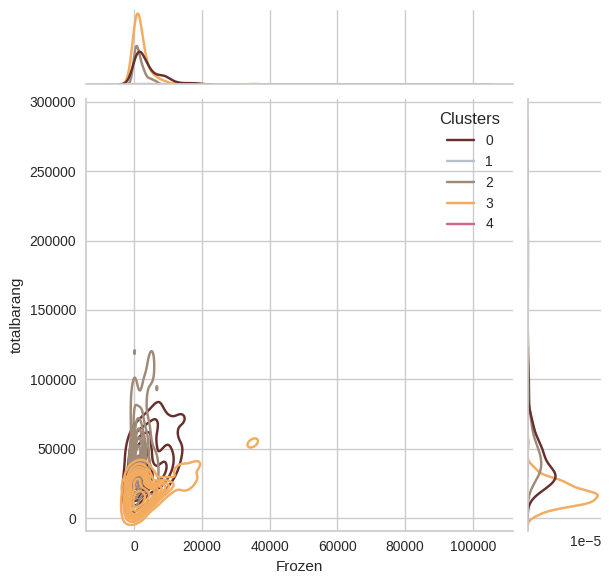

<Figure size 800x550 with 0 Axes>

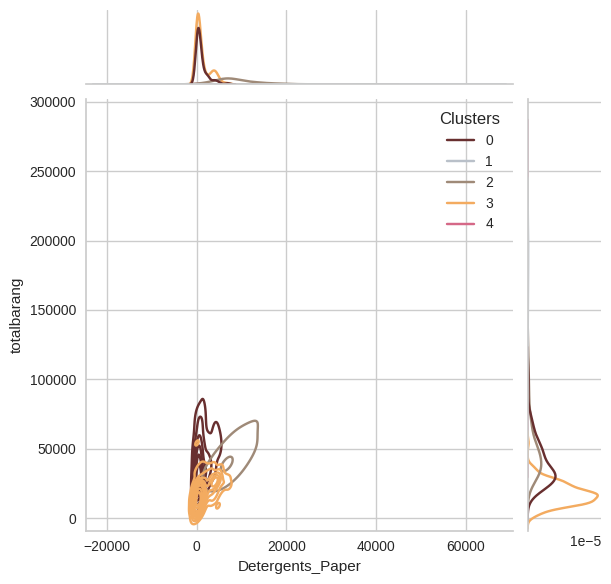

<Figure size 800x550 with 0 Axes>

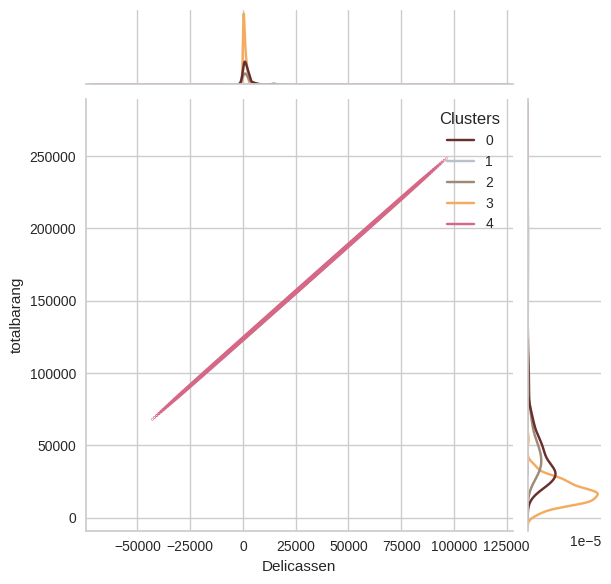

In [ ]:
for i in Rasio:
    plt.figure()
    sns.jointplot(x=data[i], y=data["totalbarang"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()

untuk penjabaran cluster:
- Cluster 0
- Cluster 1
- Cluster 2
- Cluster 3
- Cluster 4


In [ ]:


# Misalkan 'dataset' adalah DataFrame dari Wholesale Customers Data
data['totalbarang'] = data['Fresh'] + data['Milk'] + data['Grocery'] + data['Frozen'] + data['Detergents_Paper'] + data['Delicassen']

# Membuat fitur engineering: total pengeluaran dan variasi dari setiap kategori produk
data['Total_Variance'] = np.var(data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']], axis=1)
data['Total_Sum'] = np.sum(data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']], axis=1)
data.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,totalbarang,barangKonsumsi,selisih_fresh_frozen,Clusters,Total_Variance,Total_Sum
0,12669,9656,7561,214,2674,1338,34112,31438,12455,3,2.099314e+07,34112
1,7057,9810,9568,1762,3293,1776,33266,29973,5295,3,1.170814e+07,33266
2,6353,8808,7684,2405,3516,7844,36610,33094,3948,2,5.546322e+06,36610
3,13265,1196,4221,6404,507,1788,27381,26874,6861,0,1.911992e+07,27381
4,22615,5410,7198,3915,1777,5185,46100,44323,18700,0,4.728084e+07,46100
